In [2]:
from src.Slm import slm
import numpy as np
import matplotlib.pyplot as plt
import csv

# Loading parmaters
E = 200e9 # Elastic modulus (Pa)
D = 1*10e-3 # Diameter mm
P = 7850 # Density (kg/m^3)
F = [0,-1,0,0,0,0,0,0]

# System constants
a0 = .1
Rw0 = a0/2
Rh0 = (a0/2)*np.sqrt(3)
Rr0 = 1
Rf0 = False

# Simulation parameters
step_size = a0/10
Rr_count = 30

# Define ranges to sweep through in simulation
Rh_range = np.arange(0.1*a0,3*a0,step_size)
Rw_range = np.arange(-5*a0,3*a0,step_size)
Rr_range = np.linspace(0.2,1,Rr_count)

# Collects and writes properties of mechanisms
def write_properties(SLM,Rr,Rf,A,Rh,Rw,file_name):
    try:
        SLM.update_links(Rr,Rf,A=A,Rh=Rh,Rw=Rw)
        k_max,k_min,range,mass = SLM.find_system_properties(F,E,D,P)
        with open(file_name, 'a', newline='') as csvfile:
            slm_writer = csv.writer(csvfile, delimiter=' ',
                    quotechar='|', quoting=csv.QUOTE_MINIMAL)
            slm_writer.writerow([Rr,Rf,Rh,Rw,A,k_max,k_min,range,mass])
        return k_max,k_min,range,mass
    except Exception as e: print("Error encountered:",e,"Params:",Rr,Rf,A,Rh,Rw)

print(len(Rh_range),len(Rw_range),len(Rr_range))

def Rw_sweep():
    SLM = slm.mechanism(Rr=Rr0,Rf=False,A=a0,Rh=Rh0,Rw=Rw0)
    # Path to csv results
    file_name = "./results/simulation/Rw_limits.csv"
    # Create new file with column headers
    with open(file_name, 'w', newline='') as csvfile:
        slm_writer = csv.writer(csvfile, delimiter=' ',
                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        slm_writer.writerow(["Rr","Rf","Rh","Rw","A","k_max","k_min","Range","Mass"])
    # Save results    
    for Rw in Rw_range:
        if not (Rw<0.1*a0 and Rw>-0.1*a0) and not (Rw<-.9*a0 and Rw>-1.1*a0):
            write_properties(SLM,Rr0,Rf0,a0,Rh0,Rw,file_name)

def Rh_sweep():
    SLM = slm.mechanism(Rr=Rr0,Rf=False,A=a0,Rh=Rh0,Rw=Rw0)
    # Path to csv results
    file_name = "./results/simulation/Rh_limits.csv"
    # Create new file with column headers
    with open(file_name, 'w', newline='') as csvfile:
        slm_writer = csv.writer(csvfile, delimiter=' ',
                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        slm_writer.writerow(["Rr","Rf","Rh","Rw","A","k_max","k_min","Range","Mass"])
    # Save results    
    for Rh in Rh_range:
        write_properties(SLM,Rr0,Rf0,a0,Rh,Rw0,file_name)

def Rr_sweep():
    SLM = slm.mechanism(Rr=Rr0,Rf=False,A=a0,Rh=Rh0,Rw=Rw0)
    # Path to csv results
    file_name = "./results/simulation/Rr_limits.csv"
    # Create new file with column headers
    with open(file_name, 'w', newline='') as csvfile:
        slm_writer = csv.writer(csvfile, delimiter=' ',
                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        slm_writer.writerow(["Rr","Rf","Rh","Rw","A","k_max","k_min","Range","Mass"])
    # Save results    
    for Rr in Rr_range:
        write_properties(SLM,Rr,Rf0,a0,Rh0,Rw0,file_name)

# Run simulation
Rw_sweep()
Rh_sweep()
Rr_sweep()

30 80 30


In [3]:
import numpy as np
from src.Slm import slm
import matplotlib.pyplot as plt

# System constants
a0 = .1
Rw0 = a0/2
Rh0 = (a0/2)*np.sqrt(3)
Rr0 = 1
Rf0 = False

# Forcing simulation constants
F = [0,-100 ,0,0,0,0,0,0]
E = 200e9
P = 7850   
D = 5

# Step sizes for sweep
step_size = a0/20
Rr_step = 1/20

# Ranges to test in simulation
Rh_range = np.arange(0.1*a0,3*a0,step_size)
Rw_range = np.arange(-5*a0,3*a0,step_size)
Rr_range = np.arange(0.1,1,Rr_step)

# Sweep Functions
def Rw_sweep():
    SLM = slm.mechanism(Rr=Rr0,Rf=False,A=a0,Rh=Rh0,Rw=Rw0)
    K_list, R_list, W_list = [], [], []
    for Rw in Rw_range:
        SLM.update_links(Rr0,Rf0,A=a0,Rh=Rh0,Rw=Rw)
        _,k_min,range,weight,_ = SLM.find_system_properties(F,E,D,P)
        K_list.append(k_min)
        R_list.append(range)
        W_list.append(weight)
    return K_list, R_list, W_list

def Rh_sweep():
    SLM = slm.mechanism(Rr=Rr0,Rf=False,A=a0,Rh=Rh0,Rw=Rw0)
    K_list, R_list, W_list = [], [], []
    for Rh in Rh_range:
        # Make sure we don't test close to the singularity points
        if not (Rh<0.1*a0 and Rh>-0.1*a0) and not (Rh<-.9*a0 and Rh>-1.1*a0):
            SLM.update_links(Rr0,Rf0,A=a0,Rh=Rh,Rw=Rw0)
            _,k_min,range,weight,_ = SLM.find_system_properties(F,E,D,P)
        else:
            k_min,range,weight = np.NaN,np.NaN,np.NaN
        K_list.append(k_min)
        R_list.append(range)
        W_list.append(weight)
    return K_list, R_list, W_list

def Rr_sweep():
    SLM = slm.mechanism(Rr=Rr0,Rf=False,A=a0,Rh=Rh0,Rw=Rw0)
    K_list, R_list, W_list = [], [], []
    for Rr in Rr_range:
        SLM.update_links(Rr,Rf0,A=a0,Rh=Rh0,Rw=Rw0)
        _,k_min,range,weight,_ = SLM.find_system_properties(F,E,D,P)
        K_list.append(k_min)
        R_list.append(range)
        W_list.append(weight)
    return K_list, R_list, W_list

# Visualize Results
Rw_K_list, Rw_R_list, Rw_W_list = Rw_sweep()
Rh_K_list, Rh_R_list, Rh_W_list = Rh_sweep()
Rr_K_list, Rr_R_list, Rr_W_list = Rr_sweep()

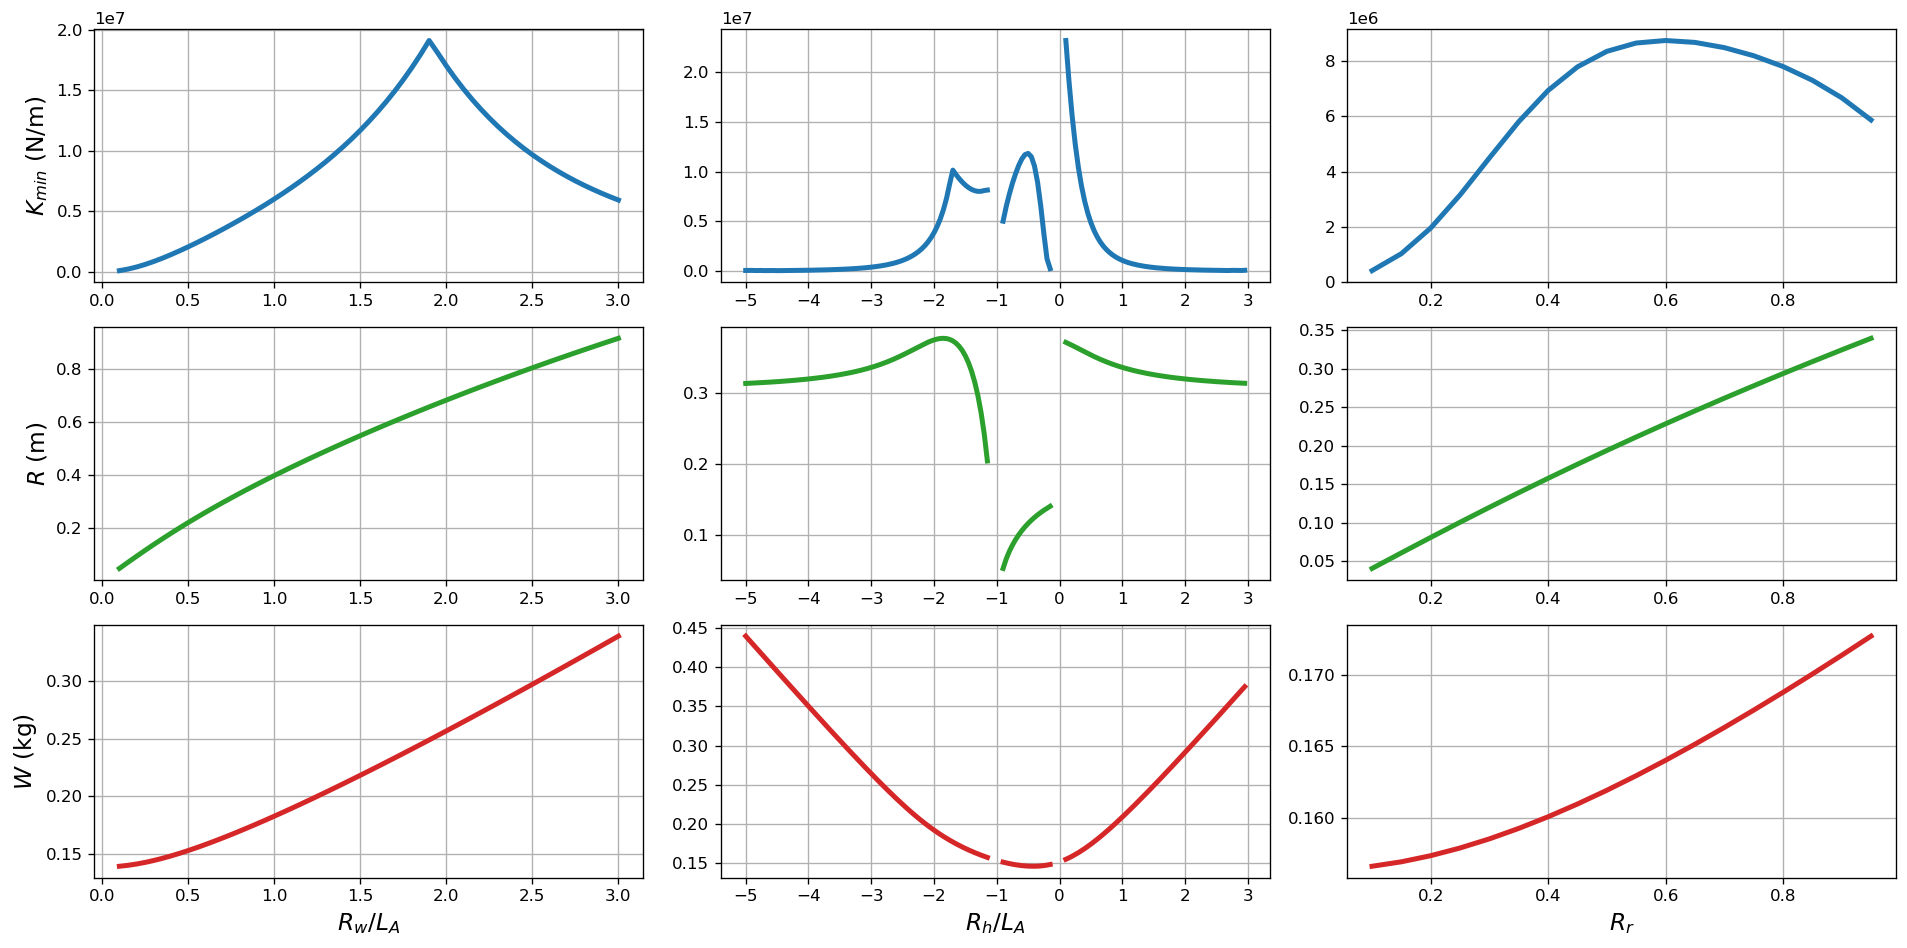

In [37]:
# Plotting params
lw = 3
c1,c2,c3 = "tab:blue","tab:green","tab:red"
label_size = 14
title_size = 14

plt.figure(figsize=(16, 8), dpi=120)
ax1=plt.subplot(3,3,1)
plt.grid()
plt.plot(Rw_range/a0,Rw_K_list,linewidth=lw,color=c1)
plt.ylabel("$K_{min}$ (N/m)",fontsize=label_size)
# plt.title("$R_w/A$ vs Performance Metrics",fontsize=title_size)
ax2 = plt.subplot(3,3,4)
plt.grid()
plt.plot(Rw_range/a0,Rw_R_list,linewidth=lw,color=c2)
plt.ylabel("$R$ (m)",fontsize=label_size)
ax3 = plt.subplot(3,3,7)
plt.grid()
plt.plot(Rw_range/a0,Rw_W_list,linewidth=lw,color=c3)
plt.ylabel("$W$ (kg)",fontsize=label_size)
plt.xlabel("$R_w/L_A$",fontsize=label_size)



ax1=plt.subplot(3,3,2)
plt.grid()
plt.plot(Rh_range/a0,Rh_K_list,linewidth=lw,color=c1)
# plt.ylabel("$K_{min}$ (N/m)",fontsize=label_size)
# plt.title("$R_h/A$ vs Performance Metrics",fontsize=title_size)
ax2 = plt.subplot(3,3,5)
plt.grid()
plt.plot(Rh_range/a0,Rh_R_list,linewidth=lw,color=c2)
# plt.ylabel("$R$ (m)",fontsize=label_size)
ax3 = plt.subplot(3,3,8)
plt.grid()
plt.plot(Rh_range/a0,Rh_W_list,linewidth=lw,color=c3)
# plt.ylabel("$W$ (kg)",fontsize=label_size)
plt.xlabel("$R_h/L_A$",fontsize=label_size)


ax1=plt.subplot(3,3,3)
plt.grid()
plt.plot(Rr_range,Rr_K_list,linewidth=lw,color=c1)
# plt.ylabel("$K_{min}$ (N/m)",fontsize=label_size)
ax = plt.gca()
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.title("$Rr$ vs Performance Metrics",fontsize=title_size)
ax2 = plt.subplot(3,3,6)
plt.grid()
plt.plot(Rr_range,Rr_R_list,linewidth=lw,color=c2)
# plt.ylabel("$R$ (m)",fontsize=label_size)
ax3 = plt.subplot(3,3,9)
plt.grid()
plt.plot(Rr_range,Rr_W_list,linewidth=lw,color=c3)
# plt.ylabel("$W$ (kg)",fontsize=label_size)
plt.xlabel("$R_r$",fontsize=label_size)


plt.tight_layout()
plt.savefig("./images/simulation_limits.jpg")
plt.show()